In [14]:
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt

In [218]:
rv = stats.norm(2, 4)

In [219]:
data = rv.rvs(size = 150)

In [220]:
rv.std()  ### this is our population standard deviation

4.0

In [221]:
np.std(data, ddof = 1)

3.9040891390399275

In [222]:
replicate_data = [np.std(np.random.choice(data, size = 150), ddof = 1) for i in range(10000)]
replicate_data_ = [np.std(rv.rvs(size = 150), ddof = 1) for i in range(10000)]


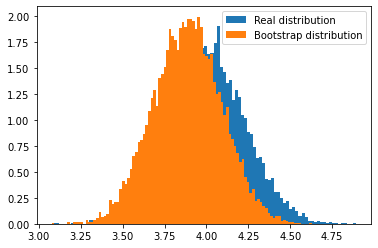

In [223]:
plt.hist(replicate_data_, density = True, bins = 100, label = "Real distribution");
plt.hist(replicate_data, density = True, bins = 100, label = "Bootstrap distribution");
plt.legend()
plt.show()

In [224]:
data = (data,)

In [134]:
data = data[0]

In [143]:
std = lambda x, axis: np.std(x, axis, ddof  = 1)

See here first!!!
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

In [144]:
bootstrap_ = scipy.stats.bootstrap(data, std)

In [148]:
bootstrap_.confidence_interval

3.6393205607570893

In [215]:
for method in {"percentile", "basic", "bca"}:
    bootstrap_ = scipy.stats.bootstrap(data, std, method = method, confidence_level= 0.05)
    print(f"{bootstrap_.confidence_interval} of {method} 95% confidence interval")

ConfidenceInterval(low=3.473918262024633, high=3.4948618322473153) of percentile 95% confidence interval
ConfidenceInterval(low=3.50718438443547, high=3.5283952482353036) of basic 95% confidence interval
ConfidenceInterval(low=3.5061479174451717, high=3.5279282463391555) of bca 95% confidence interval


In [201]:
import tqdm

In [216]:
N = 1000
count = 0
range_ = tqdm.tqdm(range(N))

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

In [217]:
for i in range_:

    data = rv.rvs(size = 150)
    data = (data,)
    bootstrap_ = scipy.stats.bootstrap(data, std, method = "basic", confidence_level = 0.95)
    U = bootstrap_.confidence_interval.high
    L = bootstrap_.confidence_interval.low
    if L <= 4.0 <= U:
        count += 1
print(f"We have an {count/N} confidence")    

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 22.01it/s]

We have an 0.944 confidence


## Some  Markov Stuff

In [226]:
tp = np.array([[0.6, 0.3, 0.1], [0.5, 0.3, 0.2], [.2, .1, .7]])

In [231]:
def power(td, n):
    temp = td
    for _ in range(n-1):
        temp = temp @ td
    return temp

In [236]:
power(tp, 10000)

array([[0.45238095, 0.23809524, 0.30952381],
       [0.45238095, 0.23809524, 0.30952381],
       [0.45238095, 0.23809524, 0.30952381]])